# **Diplomado IA: Aplicaciones 1 - NLP**. <br> Práctico 2: Word Embeddings
---
---

**Profesores:**
- Carlos Aspillaga
- Pablo Messina

**Ayudante:**
- Nissim Ergas
---
---

# **Instrucciones Generales**


El siguiente práctico se puede realizar **individualmente o en parejas**. Solo uno debe realizar la entrega. El formato de entrega es el **archivo .ipynb con todas las celdas ejecutadas**. Todas las preguntas deben ser respondidas en las celdas dispuestas para ello. No se aceptará el _output_ de una celda de código como respuesta.

**Nombre compañero 1:** Francisco Mena

**Nombre compañero 2:** COMPLETAR

El siguiente práctico cuenta con varias secciones y en varias de ellas se incluye actividades a realizar.

**IMPORTANTE: habrá un bonus de 1 décima para todos aquellos alumnos/as que muestren buen orden en sus respuestas (esto aplica a legibilidad de código, buena redacción, formalidad, organización del jupyter notebook, seguimiento de instrucciones, etc). El criterio lo pondrá cada ayudante corrector. La nota máxima obtenible en el laboratorio es 7.0**

# **Importamos librerías a usar**

In [ ]:
import gdown
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re

from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Descargamos Word2vec pre-entrenado**

In [ ]:
url = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=False)

Downloading...
From: https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:35<00:00, 46.4MB/s]


'GoogleNews-vectors-negative300.bin.gz'

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
goog_wordvecs = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True, limit=100000)

# **Analogías con Word2vec**
## (Álgebra de vectores con interpretación semántica)

Inspirado y basado en: https://github.com/dccuchile/spanish-word-embeddings/blob/master/examples/Ejemplo_WordVectors.ipynb

Ejemplo de uso: most_similar_cosmul(positive=lista_palabras_positivas, negative=lista_palabras_negativas)

Esta llamada encuentra las palabras del vocabulario que están más cercanas a las palabras en listas_palabras_positivas y no estén cercanas a lista_palabras_negativas (para una formalización del procedimiento, ver la fórmula (4) en la Sección 6 de este [artículo](http://www.aclweb.org/anthology/W14-1618)).

Cuando lista_palabras_positivas contiene dos palabras, digamos a y b_p, y lista_palabras_negativas contiene una palabra, digamos a_p, el anterior procedimiento se lee coloquialmente como el encontrar la palabra b que responde a la pregunta: a_p es a a como b_p es a ???. El ejemplo clásico se tiene cuando a es rey, b_p es mujer, y a_p es hombre. La palabra buscada b es reina, pues hombre es a rey como mujer es a reina.

In [ ]:
goog_wordvecs.most_similar_cosmul(positive=['woman','king'],negative=['queen'])

[('man', 0.9307777285575867),
 ('boy', 0.8291135430335999),
 ('motorcyclist', 0.7735415101051331),
 ('teenage_girl', 0.7693272829055786),
 ('teenager', 0.7692984938621521),
 ('taxi_driver', 0.7674798965454102),
 ('girl', 0.7596036195755005),
 ('victim', 0.7527119517326355),
 ('bicyclist', 0.7488751411437988),
 ('father', 0.7468023896217346)]

In [ ]:
goog_wordvecs.most_similar_cosmul(positive=['actor','woman'],negative=['man'])

[('actress', 1.0588080883026123),
 ('actresses', 0.930428147315979),
 ('Best_Actress', 0.8946203589439392),
 ('Actress', 0.8936436772346497),
 ('comedienne', 0.8506139516830444),
 ('Best_Supporting_Actress', 0.8503093123435974),
 ('actors', 0.8433448672294617),
 ('Paltrow', 0.8427857160568237),
 ('Heigl', 0.8372300267219543),
 ('Golden_Globe', 0.8350875973701477)]

In [ ]:
goog_wordvecs.most_similar_cosmul(positive=['son','woman'],negative=['man'])

[('daughter', 1.053764820098877),
 ('mother', 1.0130525827407837),
 ('niece', 0.9732571840286255),
 ('eldest_daughter', 0.9666094779968262),
 ('granddaughter', 0.95781010389328),
 ('husband', 0.9567869901657104),
 ('daughters', 0.9557827711105347),
 ('sister', 0.9450976252555847),
 ('father', 0.9181193709373474),
 ('wife', 0.9142287969589233)]

In [ ]:
goog_wordvecs.most_similar_cosmul(positive=['play','singing'],negative=['sing'])

[('playing', 0.9153854846954346),
 ('played', 0.8183861970901489),
 ('game', 0.8155624270439148),
 ('plays', 0.8033236861228943),
 ('Playing', 0.7878930568695068),
 ('games', 0.7651411294937134),
 ('scoring', 0.7445952296257019),
 ('physicality', 0.7320943474769592),
 ('Play', 0.728746771812439),
 ('playmaking', 0.7280517220497131)]

In [ ]:
goog_wordvecs.most_similar_cosmul(positive=['play','sang'],negative=['sing'])

[('played', 0.9050214886665344),
 ('playing', 0.8536635637283325),
 ('plays', 0.8203080296516418),
 ('Playing', 0.7951125502586365),
 ('game', 0.7891285419464111),
 ('Played', 0.7801413536071777),
 ('played_sparingly', 0.7400324940681458),
 ('games', 0.737052321434021),
 ('outplayed', 0.7354370951652527),
 ('ball', 0.7341139316558838)]

In [ ]:
goog_wordvecs.most_similar_cosmul(positive=['Santiago','Venezuela'],negative=['Chile'])

[('Caracas', 0.9518517851829529),
 ('Ramírez', 0.9386518597602844),
 ('Peña', 0.918656051158905),
 ('Chavez', 0.9147827625274658),
 ('Rodríguez', 0.9133161306381226),
 ('Martinez', 0.9109025597572327),
 ('Ramirez', 0.9093918204307556),
 ('Ortiz', 0.9087135791778564),
 ('Venezuelan', 0.9070562124252319),
 ('Martínez', 0.9041159749031067)]

In [ ]:
goog_wordvecs.most_similar_cosmul(positive=['Buenos_Aires','Chile'],negative=['Santiago'])

[('Argentina', 1.010602593421936),
 ('Brazil', 0.9226211905479431),
 ('Uruguay', 0.8886620402336121),
 ('Chilean', 0.8861171007156372),
 ('Argentine', 0.879367470741272),
 ('Argentines', 0.8666806221008301),
 ('Peru', 0.863406240940094),
 ('Paraguay', 0.8630523681640625),
 ('Bolivia', 0.8587836027145386),
 ('President_Nestor_Kirchner', 0.8434462547302246)]

**Actividad 1**

Use su creatividad y encuentre al menos unos 3 ejemplos interesantes adicionales de analogías (hay 3 celdas en blanco abajo para ello, pero siéntase libre de agregar más si lo desea). Luego comente más abajo por qué escogió dichos ejemplos.

In [ ]:
goog_wordvecs.most_similar_cosmul(positive=['Vegetables','Vegan'],negative=['Meat'])

[('Herbs', 0.8506293296813965),
 ('Recipes', 0.846846878528595),
 ('veggies', 0.8460578918457031),
 ('veggie', 0.831598699092865),
 ('Vegetarian', 0.8206036686897278),
 ('herbs', 0.8185856938362122),
 ('Cooking', 0.8173354864120483),
 ('Dishes', 0.8162689208984375),
 ('Baked', 0.8119561076164246),
 ('kale', 0.8039235472679138)]

In [ ]:
goog_wordvecs.most_similar_cosmul(positive=['racket','tennis'],negative=['soccer'])

[('rackets', 1.0587873458862305),
 ('racquet', 1.0481599569320679),
 ('groundstrokes', 0.9866098165512085),
 ('Schnyder', 0.9772009253501892),
 ('Roddick', 0.9743760228157043),
 ('forehands', 0.9712996482849121),
 ('Davydenko', 0.9643523693084717),
 ('Agassi', 0.960224449634552),
 ('Djokovic', 0.9579830169677734),
 ('Berdych', 0.9571759104728699)]

In [ ]:
goog_wordvecs.most_similar_cosmul(positive=['swimming','athlete'],negative=['running'])

[('swimmer', 1.2377222776412964),
 ('swimmers', 1.105785608291626),
 ('athletes', 1.077569603919983),
 ('diver', 1.0565121173858643),
 ('gymnast', 1.0554314851760864),
 ('gymnastics', 1.0377086400985718),
 ('Swimming', 1.018602728843689),
 ('water_polo', 1.0125449895858765),
 ('pole_vaulter', 1.003133773803711),
 ('triathlete', 0.9965822100639343)]

**Comente aquí los ejemplos**: 
Es interesante que a la carne la relaciona con hierbas. La relacion de soccer no es muy clara, muestra más palabras de tennis en vez de palabras relacionadas a soccer u otros deportes. Y con running, es interesante que muestra otros deportes como gimnasia, water polo, o triatleta.
Elegí "meat" y "vegan" porque son terminos bien opuestos, y los otros ejemplos de deportes (swimming, soccer) porque me imaginé que el modelo tiene bastante información de deportes.

# **Word vectors en términos excluídos**

Ejemplo de uso: doesnt_match(lista_palabras)

Esta llamada selecciona la palabra dentro de listas_palabras que está más lejana del resto de las palabras de la lista. La distancia es simplemente el ángulo entre las direcciones de los vectores de las palabras.

In [ ]:
goog_wordvecs.doesnt_match(['white','blue','red','Chile'])

'Chile'

In [ ]:
goog_wordvecs.doesnt_match(['Sun','Moon','lunch','Jupiter'])

'lunch'

In [ ]:
goog_wordvecs.doesnt_match(['April', 'May', 'September', 'Tuesday', 'July'])

'Tuesday'

In [ ]:
goog_wordvecs.doesnt_match(['Monday', 'Tuesday', 'September', 'Thursday', 'Friday'])

'September'

In [ ]:
goog_wordvecs.doesnt_match(['Lima', 'Paris', 'London', 'Madrid'])

'Lima'

**Actividad 2**

Use su creatividad y encuentre al menos unos 3 ejemplos interesantes adicionales de términos excluidos (hay 3 celdas en blanco abajo para ello, pero siéntase libre de agregar más si lo desea). Luego comente más abajo por qué escogió dichos ejemplos.

In [ ]:
goog_wordvecs.doesnt_match(['banana','apple', 'orange', 'lettuce'])

'orange'

In [ ]:
goog_wordvecs.doesnt_match(['chicken', 'beef', 'pork', 'tofu'])

'tofu'

In [ ]:
goog_wordvecs.doesnt_match(['pants', 'shoes', 'shirt', 'socks', 'glasses'])

'glasses'

**Comentario**

Es interesante que el modelo distingue tofu y lentes, pero me llama la atencion que elije la naranja en vez de la lechuga. Quizas el modelo piensa en el color.
Elegi estos ejemplos porque queria ver si el modelo distingue las diferencias entre vegetales y frutas, si distingue que tofu no es una carne, o que lentes no son ropa.


# **Visualizando Word Embeddings**

Proyectamos los word vectors a un plano 2D usando reducción de dimensionalidad con PCA

In [ ]:
vectors_2d = PCA(n_components=2).fit_transform(goog_wordvecs.vectors)

Recolectamos todas las palabras del vocabulario en una lista

In [ ]:
all_words = [None] * len(goog_wordvecs.vocab)
for k,v in goog_wordvecs.vocab.items():
  all_words[v.index] = k

Funciones para generar scatter plots de word vectors con sus respectivas palabras en un plano 2D

In [ ]:
# Esta función escoge palabras del vocabulario de manera aleatoria
def plot_word_embeddings_2d_random(words, embeddings, n_samples):
  n = len(words)
  indices = random.sample(range(n), n_samples)
  X = [embeddings[i][0] for i in indices]
  Y = [embeddings[i][1] for i in indices]
  plt.figure(figsize=(15,9))
  plt.scatter(X, Y, linewidths=5, color='blue')
  plt.xlabel("PC1",size=15)
  plt.ylabel("PC2",size=15)
  plt.title("Word Embedding Space", size=20)
  for i in range(n_samples):
    plt.annotate("  " + words[indices[i]], xy=(X[i],Y[i]))
  plt.show()

# Esta función recibe de forma explícita las palabras
def plot_word_embeddings_2d(words, vocab, embeddings):
  indices = [vocab[w].index for w in words]
  X = [embeddings[i][0] for i in indices]
  Y = [embeddings[i][1] for i in indices]
  plt.figure(figsize=(15,9))
  plt.scatter(X, Y, linewidths=5, color='blue')
  plt.xlabel("PC1",size=15)
  plt.ylabel("PC2",size=15)
  plt.title("Word Embedding Space", size=20)
  for i, word in enumerate(words):
    plt.annotate("  " + word, xy=(X[i],Y[i]))
  plt.show()

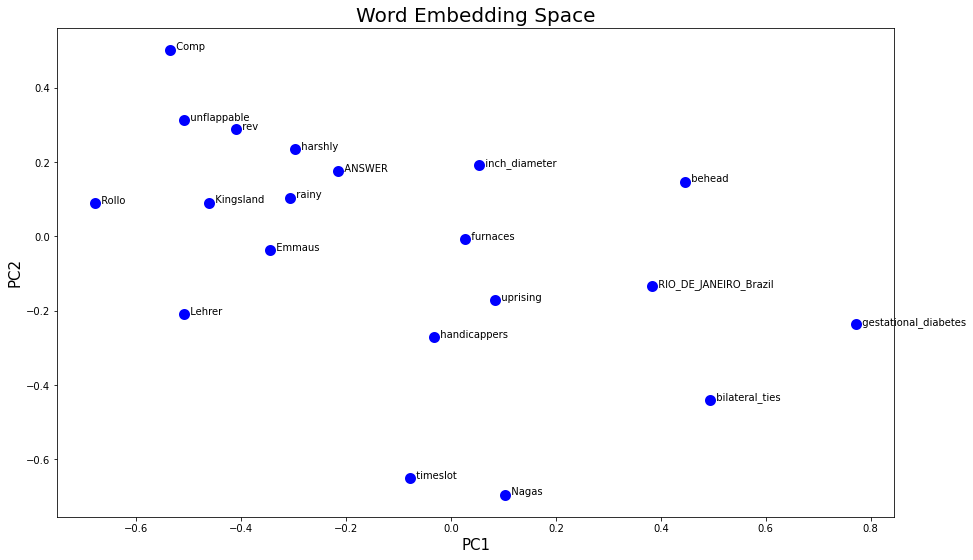

In [ ]:
plot_word_embeddings_2d_random(all_words, vectors_2d, 20)

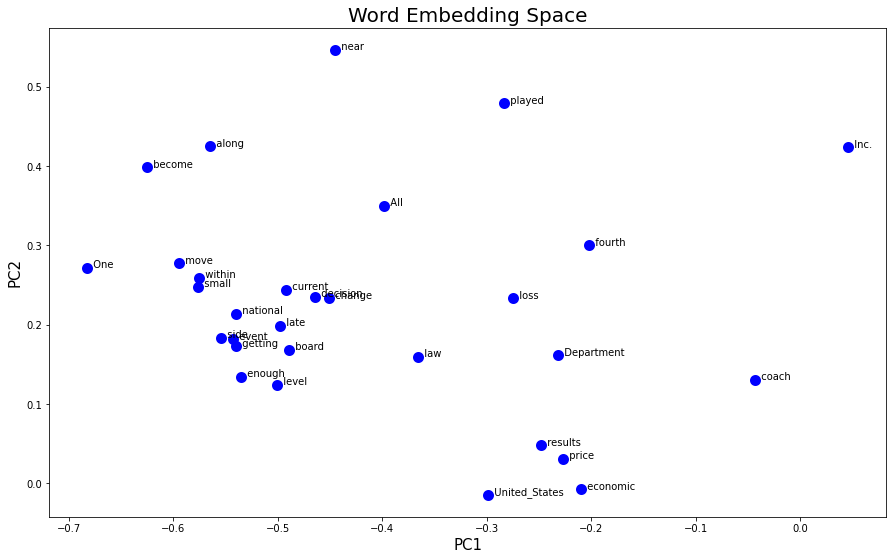

In [ ]:
plot_word_embeddings_2d(all_words[400:430], goog_wordvecs.vocab, vectors_2d)

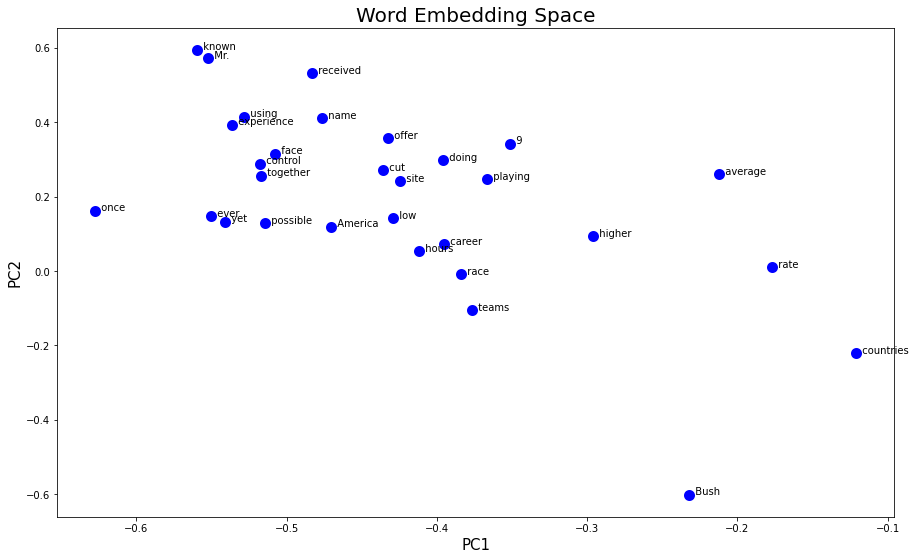

In [ ]:
plot_word_embeddings_2d(all_words[500:530], goog_wordvecs.vocab, vectors_2d)

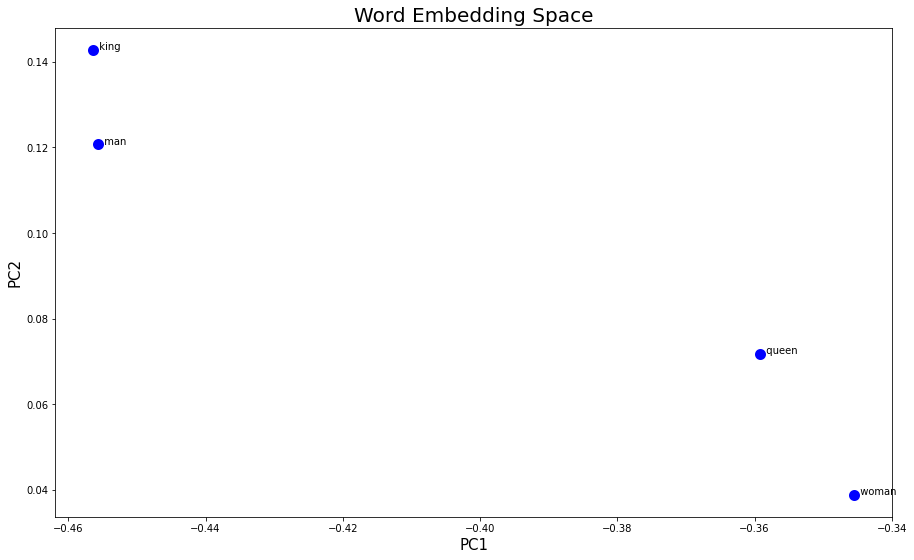

In [ ]:
plot_word_embeddings_2d(["queen", "king", "woman", "man"],
                        goog_wordvecs.vocab, vectors_2d)

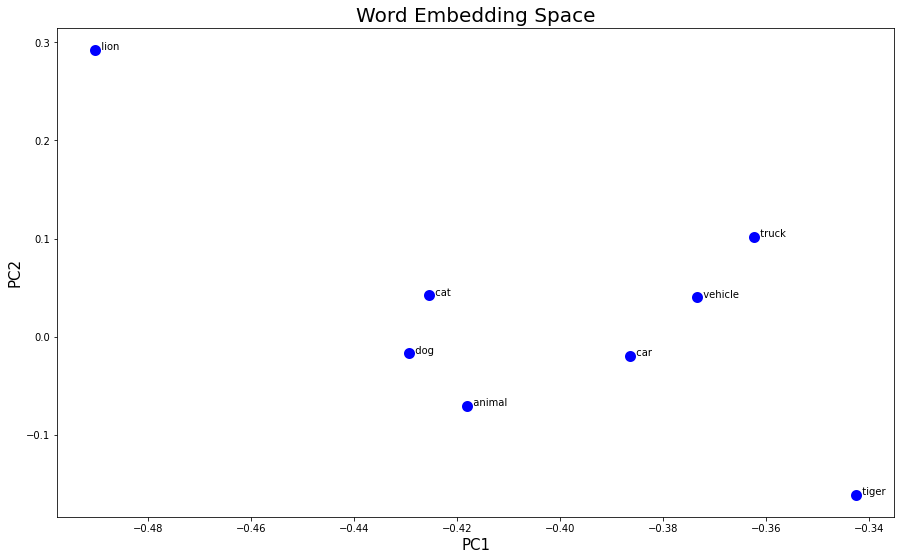

In [ ]:
plot_word_embeddings_2d(["dog", "cat", "animal", "lion", "tiger", "car", "truck", "vehicle"],
                        goog_wordvecs.vocab, vectors_2d)

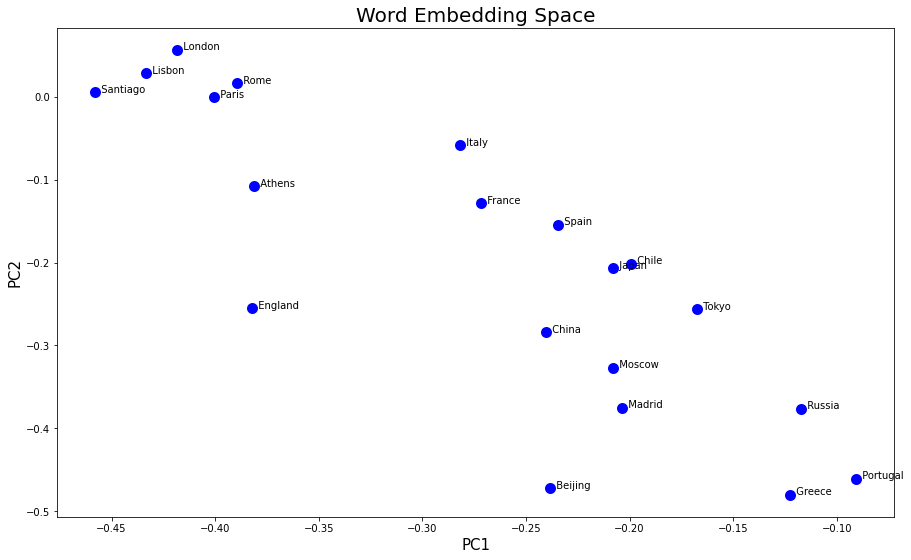

In [ ]:
words = [
         "Chile", "Santiago",
         "England", "London",
         "France", "Paris",
         "China", "Beijing",
         "Russia", "Moscow",
         "Japan", "Tokyo",
         "Spain", "Madrid",
         "Portugal", "Lisbon",
         "Italy", "Rome",
         "Greece", "Athens",
         ]
plot_word_embeddings_2d(words, goog_wordvecs.vocab, vectors_2d)

**Actividad 3**


Use su creatividad y genere al menos unos 3 gráficos adicionales que le parezcan interesantes (hay 3 celdas en blanco abajo para ello, pero siéntase libre de agregar más si lo desea). Luego comente más abajo por qué escogió dichos gráficos.

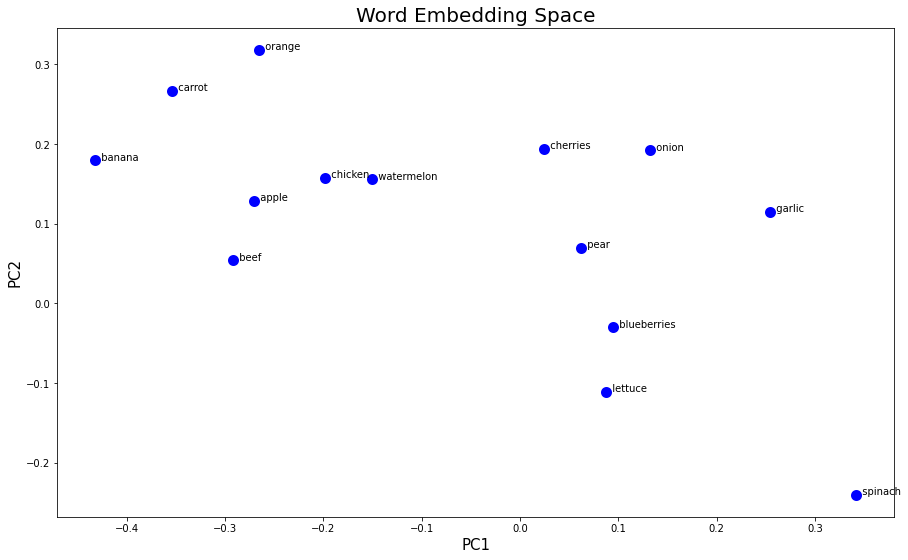

In [ ]:
words = [
         "banana", "apple", "orange", "watermelon", "blueberries", "cherries", "pear", "lettuce", "spinach", "carrot", 
         "onion", "garlic", "chicken", "beef",
         ]
plot_word_embeddings_2d(words, goog_wordvecs.vocab, vectors_2d)

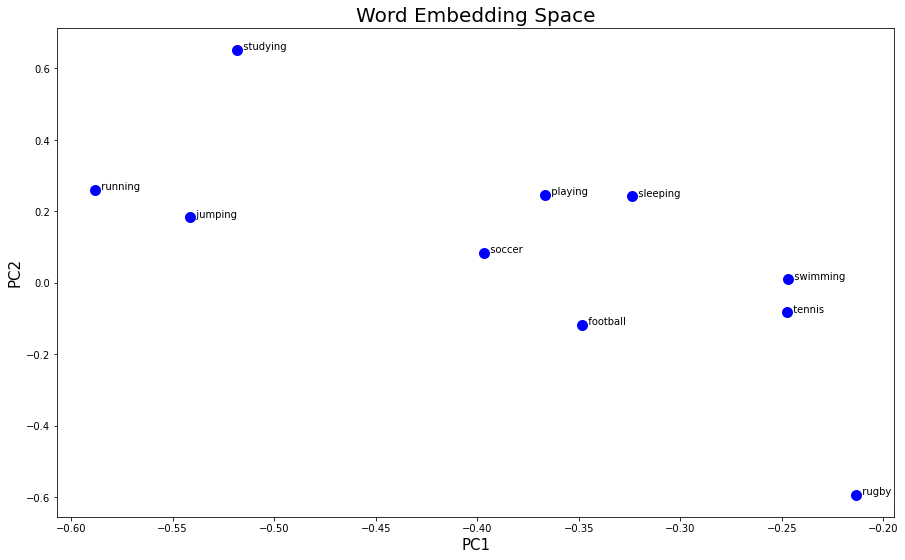

In [ ]:
words = [
         "swimming", "running", "jumping", "playing", "tennis", "soccer", "rugby", "football", "sleeping", "studying"
         ]
plot_word_embeddings_2d(words, goog_wordvecs.vocab, vectors_2d)

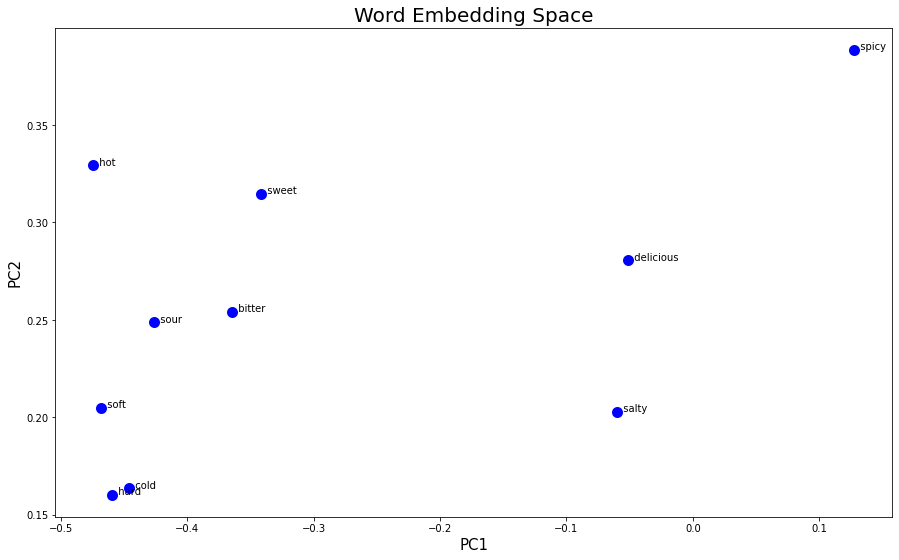

In [ ]:
words = [
         "sweet", "sour", "hot", "cold", "spicy", "delicious", "soft", "hard", "salty", "bitter"
         ]
plot_word_embeddings_2d(words, goog_wordvecs.vocab, vectors_2d)

**Comentario**

Es interesante que carne y pollo aparecen cerca, que estudiar aparece tan lejos de los deportes, y que spicy esta tan lejos de "soft" o "cold". El modelo parece que logra detectar patrones importantes en las palabras. 
Elegi estas palabras para ver si el modelo distingue entre distintos tipos de comida, o de deportes, o entre distintos adjetivos.

**Actividad 4**

Responda la siguiente pregunta:

**Pregunta**: ¿Cuál cree usted que sea la explicación de la propiedad de álgebra semántica demostrada por word embeddings como Word2vec? ¿A qué se debe que sumando y restando vectores podamos hacer analogías, detectar términos excluídos, entre otras cosas?

Esta pregunta no es sencilla, por lo que se le invita a investigar en internet y resumir en sus palabras lo que logre entender. Recuerde citar el material consultado.

**Su respuesta**:

Los vectores que crea el modelo son representaciones matemáticas de cada palabra que el computador puede leer. Semánticamente, uno podría pensar que estos vectores estan correlacionados a la combinación de sus componentes semánticas, por ejemplo, el vector de "rey" contiene partes del vector "hombre", "gobernante", "persona", etc. Similarmente, el vector "reina" estaría compuesta por vectores similares, excepto que tiene "mujer" en vez de "hombre". Por eso, al restar "rey" y "reina" quedaría la componente que más difiere, en este caso, "mujer" en vez de "hombre".

Referencias:
- https://medium.com/@zafaralibagh6/simple-tutorial-on-word-embedding-and-word2vec-43d477624b6d
- https://stats.stackexchange.com/questions/145438/word2vec-interpretation-of-subtraction-or-addition-of-vectors
- https://blog.galvanize.com/add-and-subtract-words-like-vectors-with-word2vec-2/


# **Análisis de Sentimiento de Tweets usando Word embeddings**

Inspirado en: https://github.com/tthustla/twitter_sentiment_analysis_part1

Descargamos el dataset de tweets

In [ ]:
!wget https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

--2020-12-13 16:33:48--  https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81363704 (78M) [application/zip]
Saving to: ‘trainingandtestdata.zip’

trainingandtestdata 100%[===================>]  77.59M  37.9MB/s    in 2.0s    

2020-12-13 16:33:51 (37.9 MB/s) - ‘trainingandtestdata.zip’ saved [81363704/81363704]



In [ ]:
!unzip trainingandtestdata.zip

Archive:  trainingandtestdata.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
!ls

GoogleNews-vectors-negative300.bin.gz
sample_data
testdata.manual.2009.06.14.csv
training.1600000.processed.noemoticon.csv
trainingandtestdata.zip


Cargamos el csv de entrenamiento en un dataframe de pandas

In [ ]:
df_train = pd.read_csv('./training.1600000.processed.noemoticon.csv',
                       header=None,
                       names=['sentiment','id','date','query_string','user','text'],
                       encoding = "ISO-8859-1")
df_train.drop(['id','date','query_string','user'], axis=1, inplace=True)

Lo inspeccionamos un poquito:

In [ ]:
df_train

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


Definimos una funcion para limpiar tweets y aprovechar de borrar stopwords

In [ ]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
tok = WordPunctTokenizer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    words = [w for w in words if w not in stop_words]
    return (" ".join(words)).strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Probamos nuestra función con algunos ejemplos para ver cómo quedan:

In [ ]:
for x in [279, 343, 0, 226, 175]:
  print('-------')
  print(df_train.text[x])
  print(tweet_cleaner(df_train.text[x]))

-------
Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. 
whinging client boss understand english well rewrote text unreadable written v good writer reviewed correctly
-------
@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down 
fun furious new mantra bay breakers getting rambunctious city overreacted clamped
-------
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
awww bummer shoulda got david carr third day
-------
Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers 
tuesday start reflection n lecture stress reducing techniques sure might become useful us accompaniers
-------
@machineplay I'm so sorry you're having to go through this. Again.  #t

Definimos una función para limpiar un dataframe completo:

In [ ]:
def clean_dataframe(df, print_every=10000):
  clean_tweet_texts = []
  for i in range(len(df)):
      if (i+1)%print_every == 0 or i+1 == len(df):
          print("Tweets %d of %d have been processed" % (i+1, len(df)))
      clean_tweet_texts.append(tweet_cleaner(df.text.iloc[i]))
  df_clean = pd.DataFrame(clean_tweet_texts, columns=['text'])
  df_clean['target'] = df.sentiment
  return df_clean

Dado que el set de entrenamiento consiste de 1.6 M de instancias, por motivos de tiempo y para fines ilustrativos sampleamos un subconjunto razonable:

In [ ]:
df_sample = df_train.sample(random_state=1, n=20000)
df_sample.reset_index(inplace=True)
df_sample

,index,sentiment,text
0,514293,0,i miss nikki nu nu already shes always there ...
1,142282,0,So I had a dream last night. I remember a sig...
2,403727,0,@girlyghost ohh poor sickly you (((hugs)) ho...
3,649503,0,it is raining again
4,610789,0,@MissKeriBaby wish I was in LA right now
...,...,...,...
19995,1200592,4,I get the worst writer's cramp. These thank yo...
19996,333050,0,@ladyinreddress the sun is all gone now...
19997,893698,4,"FINALLY a break till Wed, no work OR school, b..."
19998,1145456,4,I want a Blackberry...


Limpiamos nuestro dataframe de entrenamiento:

In [ ]:
df_samp_clean = clean_dataframe(df_sample)
df_samp_clean

Tweets 10000 of 20000 have been processed
Tweets 20000 of 20000 have been processed


,text,target
0,miss nikki nu nu already shes always needed th...,0
1,dream last night remember sign clearly told ge...,0
2,ohh poor sickly hugs hope feel little better soon,0
3,raining,0
4,wish la right,0
...,...,...
19995,get worst writer cramp thank notes killing hand,4
19996,sun gone,0
19997,finally break till wed work school hectic yay ...,4
19998,want blackberry,4


Cargamos y limpiamos el dataset de test:

In [ ]:
df_test = pd.read_csv('./testdata.manual.2009.06.14.csv',
                       header=None,
                       names=['sentiment','id','date','query_string','user','text'],
                       encoding = "ISO-8859-1")
df_test.drop(['id','date','query_string','user'], axis=1, inplace=True)
df_test = clean_dataframe(df_test, print_every=100)
df_test

Tweets 100 of 498 have been processed
Tweets 200 of 498 have been processed
Tweets 300 of 498 have been processed
Tweets 400 of 498 have been processed
Tweets 498 of 498 have been processed


,text,target
0,loooooooovvvvvveee kindle dx cool fantastic right,4
1,reading kindle love lee childs good read,4
2,ok first assesment kindle fucking rocks,4
3,love kindle mine months never looked back new ...,4
4,fair enough kindle think perfect,4
...,...,...
493,ask programming latex indesign submitted calci...,2
494,note hate word hate pages hate latex said hate...,0
495,ahhh back real text editing environment latex,4
496,trouble iran see hmm iran iran far away flocko...,0


## **Generando Tweet Vectors a partir de Word Embeddings**
Probaremos dos estrategias simples:

1) Suma de los vectores de las palabras

2) Promedio de los vectores de las palabras

Funciones para obtener matrices de numpy con las sumas/promedios de los vectores de las palabras de cada tweet:

In [ ]:
def get_embedding_sum(df, w2v, embed_dim):
  n = len(df)
  out = np.zeros((n, embed_dim))
  for i in range(n):
    for word in df.text[i].split():
      if word in w2v:
        out[i] += w2v[word]
  return out

def get_embedding_avg(df, w2v, embed_dim):
  n = len(df)
  out = np.zeros((n, embed_dim))
  for i in range(n):
    count = 0.
    for word in df.text[i].split():      
      if word in w2v:
        out[i] += w2v[word]
        count += 1
    if count > 0:
      out[i] /= count
  return out

Computamos entradas y los labels de salida para entrenar y evaluar nuestro clasificador de sentimientos:

In [ ]:
y_train = ((df_samp_clean.target == 4) + 0).to_numpy()

In [ ]:
y_test = df_test.target.to_numpy() / 4.0

In [ ]:
X_train_sum = get_embedding_sum(df_samp_clean, goog_wordvecs, 300)

In [ ]:
X_test_sum = get_embedding_sum(df_test, goog_wordvecs, 300)

In [ ]:
X_train_avg = get_embedding_avg(df_samp_clean, goog_wordvecs, 300)

In [ ]:
X_test_avg = get_embedding_avg(df_test, goog_wordvecs, 300)

#### 1) Entrenamos y evaluamos un MLP con 1 capa oculta y usando **suma** de word embeddings como entrada

In [ ]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=[50,], random_state=1, verbose=1)
clf.fit(X_train_sum, y_train)

Iteration 1, loss = 0.61849875
Iteration 2, loss = 0.56042239
Iteration 3, loss = 0.54576977
Iteration 4, loss = 0.53707918
Iteration 5, loss = 0.52608536
Iteration 6, loss = 0.51768436
Iteration 7, loss = 0.50935790
Iteration 8, loss = 0.49802519
Iteration 9, loss = 0.48935478
Iteration 10, loss = 0.48228322
Iteration 11, loss = 0.47217623
Iteration 12, loss = 0.46448450
Iteration 13, loss = 0.45620101
Iteration 14, loss = 0.44664539
Iteration 15, loss = 0.43892144
Iteration 16, loss = 0.43204252
Iteration 17, loss = 0.42405602
Iteration 18, loss = 0.41725871
Iteration 19, loss = 0.41090974
Iteration 20, loss = 0.40249311
Iteration 21, loss = 0.39649679
Iteration 22, loss = 0.38872729
Iteration 23, loss = 0.38216502
Iteration 24, loss = 0.37640367
Iteration 25, loss = 0.37522744
Iteration 26, loss = 0.36647307
Iteration 27, loss = 0.35878879
Iteration 28, loss = 0.35231100
Iteration 29, loss = 0.35006558
Iteration 30, loss = 0.34303927
Iteration 31, loss = 0.33765563
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[50], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

Evaluamos en el mismo set de train:

In [ ]:
clf.score(X_train_sum, y_train)

0.98495

Calculamos el error absoluto medio (MAE) en el set de test (entre más cercano a 0, mejor):

In [ ]:
pred_proba = clf.predict_proba(X_test_sum)
sum(abs(pred_proba.T[1] - y_test)) / len(y_test)

0.31472815409126914

#### 2) Entrenamos y evaluamos un MLP con 1 capa oculta y usando **promedio** de word embeddings como entrada

In [ ]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(50,), random_state=1, verbose=1)
clf.fit(X_train_avg, y_train)

Iteration 1, loss = 0.62416915
Iteration 2, loss = 0.55761791
Iteration 3, loss = 0.54496394
Iteration 4, loss = 0.54070303
Iteration 5, loss = 0.53645758
Iteration 6, loss = 0.53372963
Iteration 7, loss = 0.53080569
Iteration 8, loss = 0.52764666
Iteration 9, loss = 0.52447367
Iteration 10, loss = 0.52214055
Iteration 11, loss = 0.51871559
Iteration 12, loss = 0.51618074
Iteration 13, loss = 0.51411855
Iteration 14, loss = 0.51087053
Iteration 15, loss = 0.50794612
Iteration 16, loss = 0.50535801
Iteration 17, loss = 0.50240298
Iteration 18, loss = 0.50059934
Iteration 19, loss = 0.49730507
Iteration 20, loss = 0.49408342
Iteration 21, loss = 0.49145020
Iteration 22, loss = 0.48867104
Iteration 23, loss = 0.48710544
Iteration 24, loss = 0.48437182
Iteration 25, loss = 0.48130643
Iteration 26, loss = 0.47844160
Iteration 27, loss = 0.47550022
Iteration 28, loss = 0.47392769
Iteration 29, loss = 0.46992742
Iteration 30, loss = 0.46831307
Iteration 31, loss = 0.46490374
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

Evaluamos en el mismo set de train:

In [ ]:
clf.score(X_train_avg, y_train)

0.9382

Calculamos el error absoluto medio (MAE) en el set de test (entre más cercano a 0, mejor):

In [ ]:
pred_proba = clf.predict_proba(X_test_avg)
sum(abs(pred_proba.T[1] - y_test)) / len(y_test)

0.288449713808073

**Actividad 5**

Comente los resultados obtenidos por ambas estrategias. ¿Cómo interpreta los valores de error absoluto medio obtenidos en cada caso? ¿Son buenos resultados, malos, aceptables? ¿Cuál de las dos estrategias (promedio o suma) se desempeñó mejor y cuál cree usted que sea la explicación de la diferencia?

**Su respuesta:** 
Usar la suma resulta en un MAE de 0.31, mientras que el promedio tiene un mejor MAE de 0.29, lo que indica que el promedio es mejor. Me imagino que el promedio es mejor porque la suma le da mucho peso a vectores con mayor magnitud, mientras que el promedio es mas representativo de la diversidad de los vectores.
Con respecto a si es bueno o malo el resultado, creo que depende del contexto. Si es para un analisis preliminar en un proyecto, para entender la diversidad en el texto como se trabaja, puede ser una util herramienta. Pero para lleva a produccion en un proyecto, me imagino que se necesitaria una mejor precision del modelo. 

**Actividad 6**

Los métodos para obtener Tweet Vectors recién vistos son bastante sencillos, simplemente promediamos/sumamos los embeddings de las palabras. Sin duda deben haber estrategias mejores. ¿Qué otras estrategias posiblemente más sofisticadas podrían sacar mayor provecho de los word embeddings y obtener mejores representaciones para los Tweets? Mencione al menos 2 estrategias distintas que se le ocurran y justifique por qué podrían ser mejores en la tarea de Análisis de Sentimiento:

**Su respuesta:**

Un metodo que se me occure que puede dar mejores resultados seria incluir emojis en el analisis de sentimientos. Mucha gente usa emojis frecuentemente, y si el modelo fuese capas de analizar embeddings junto con los emojis, me imagino que seria una gran mejora.
Otra mejora seria usar un RNN o LSTM, que usa la secuencia de palabras para entender el significado de la frase. El modelo simple de MLPClassifier no considera el orden de palabras.

**Actividad 7**
El preprocesamiento y limpieza que hicimos de los tweets quizás no es el mejor y posiblemente se está perdiendo algo de información que podría ser útil para capturar de mejor manera los sentimientos expresados. ¿Se le ocurren mejoras a dicha etapa?

**Su respuesta:**

En la limpieza se borran los emojis, seria util mantener y procesar los emojis para incluirlos en el modelo.
Tambien se usan los stopwords de nltk, se mejorarian los resultados refinando el listado de stopwords.